In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset de localización

In [77]:
data_geo = pd.read_csv('data\olist_geolocation_dataset.csv')

In [78]:
data_geo.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [79]:
data_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


*Este dataset no contiene valores nulos*

In [80]:
data_geo.rename(columns = {'geolocation_zip_code_prefix': 'zip_code', 'geolocation_lat': 'lat', 'geolocation_lng': 'lng', 'geolocation_city': 'city', 'geolocation_state': 'state'}, inplace = True)

In [81]:
data_geo

,zip_code,lat,lng,city,state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [82]:
data_geo.city.value_counts()

sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: city, Length: 8011, dtype: int64

In [83]:
data_geo = data_geo.reindex(columns= ['state', 'city', 'zip_code', 'lat', 'lng'])

c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


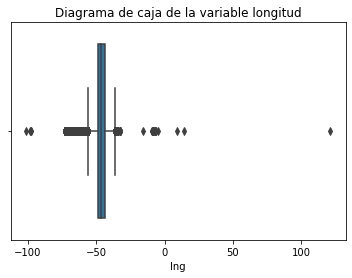

In [84]:
sns.boxplot('lng', data= data_geo)
plt.title('Diagrama de caja de la variable longitud')
plt.show()

**Observamos que algunas longitudes no coinciden con las coordenadas de Brasil**

c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


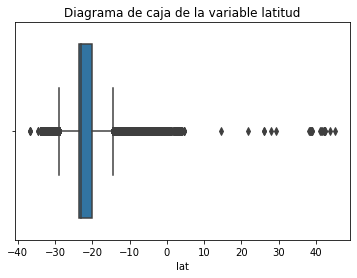

In [55]:
sns.boxplot('lat', data= data_geo)
plt.title('Diagrama de caja de la variable latitud')
plt.show()

In [85]:
data_geo[data_geo.lng == data_geo.lng.max()]

,state,city,zip_code,lat,lng
965687,RS,santa lucia do piai,95130,14.585073,121.105394


**Observamos que algunas latitudes no coinciden con las coordenadas de Brasil**

Además, tenemos coordenadas positivas. Se procede a cambiarles el signo para luego imputar

Las coordenadas de Brasil se encuentran entre los siguentes rangos:

+ Longitud : -34 a -73
+ Latitud : 5 a -33

In [102]:
print('Total de valores de longitud en positivo: ', (data_geo.lng > 0).sum())
print('Total de valores de latitud en positivo, (mayores a 5º): ', (data_geo.lat > 5).sum())

Total de valores de longitud en positivo:  3
Total de valores de latitud en positivo, (mayores a 5º):  26


In [103]:
'Reemplazamos aquellas latitudes y longitudes que estén en positivo'

for index, row in data_geo['lng'].iteritems():
    if row > 0:
        data_geo['lng'][index] = row * (-1)

for index, row in data_geo['lat'].iteritems():
    if row > 5:
        data_geo['lat'][index] = row * (-1)

C:\Users\leand\AppData\Local\Temp\ipykernel_10308\1014157902.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_geo['lng'][index] = row * (-1)
C:\Users\leand\AppData\Local\Temp\ipykernel_10308\1014157902.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_geo['lat'][index] = row * (-1)


In [104]:
print((data_geo.lng > -34).sum())
print((data_geo.lng < -73).sum())

32
5


In [110]:
print((data_geo.lat > 5).sum())
print((data_geo.lat < -33).sum())

0
285


In [118]:
print('Cantidad de ciudades en el dataset:', len(data_geo.city.unique()))

Cantidad de ciudades en el dataset: 8011


In [119]:
print('Cantidad de Estados en el dataset:', len(data_geo.state.unique()))

Cantidad de Estados en el dataset: 27


c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

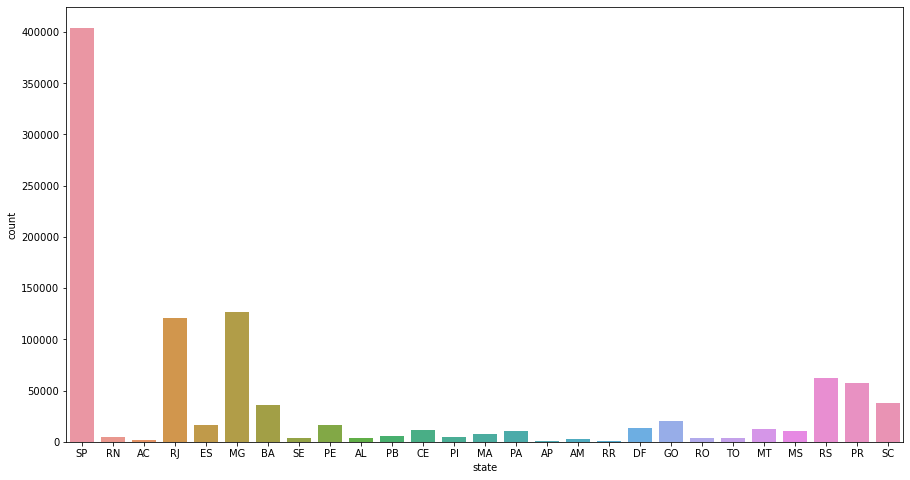

In [129]:
plt.figure(figsize=(15,8))
sns.countplot('state', data= data_geo)